# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar a base ajustada
df_preparada = pd.read_csv('base_preparada_para_scikitlearn.csv')

# Garantir que não há valores faltantes
df_preparada = df_preparada.dropna()

# Separar a variável resposta 'mau' das variáveis explicativas
X = df_preparada.drop(columns=['mau'])
y = df_preparada['mau']

# Dividir a base em 70% para treino e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir as dimensões das bases de treino e validação
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, y_train: {y_train.shape}, y_val: {y_val.shape}")


X_train: (11655, 28), X_val: (4995, 28), y_train: (11655,), y_val: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

##### Passo 1: Definir o modelo de árvore de decisão #####

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 1) Definir o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)


##### Passo 2: Treinar o modelo #####

In [5]:
# 2) Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

##### Passo 3: Visualizar a árvore de decisão #####

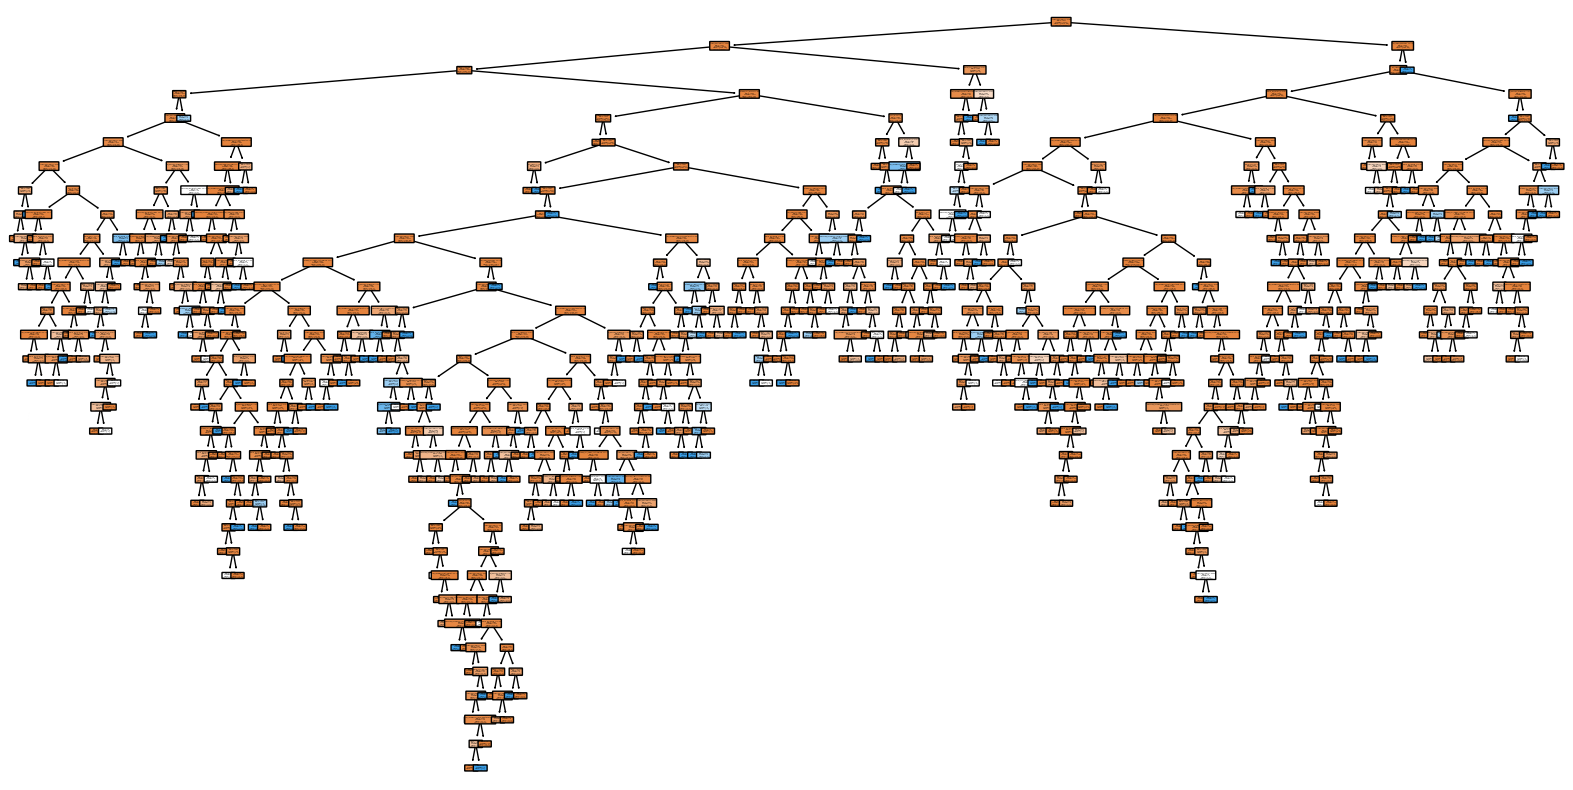

In [7]:
import matplotlib.pyplot as plt

# 3) Aumentar o tamanho da figura para visualização da árvore
plt.figure(figsize=(20,10))

# Visualizar a árvore de decisão
tree.plot_tree(modelo_arvore, filled=True, feature_names=X_train.columns, class_names=['aprovado', 'reprovado'], rounded=True)
plt.show()


##### Passo 4: Produzir a matriz de confusão #####

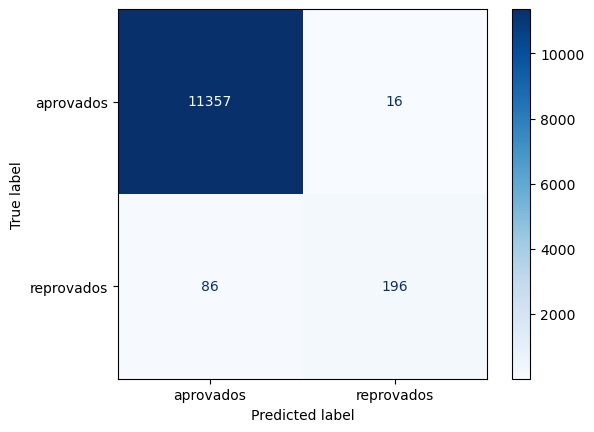

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 4) Fazer previsões na base de treino
y_pred_train = modelo_arvore.predict(X_train)

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(y_train, y_pred_train)

# Exibir a matriz de confusão com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['aprovados', 'reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


##### Passo 5: Calcular a acurácia na base de treinamento #####

In [11]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia na base de treinamento
acuracia_treino = accuracy_score(y_train, y_pred_train)
print(f"Acurácia na base de treinamento: {acuracia_treino:.2f}")


Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

##### Passo 1: Classificar a base de teste #####

In [13]:
# Fazer previsões na base de validação (teste)
y_pred_test = modelo_arvore.predict(X_val)

##### Passo 2: Produzir a matriz de confusão para a base de teste #####

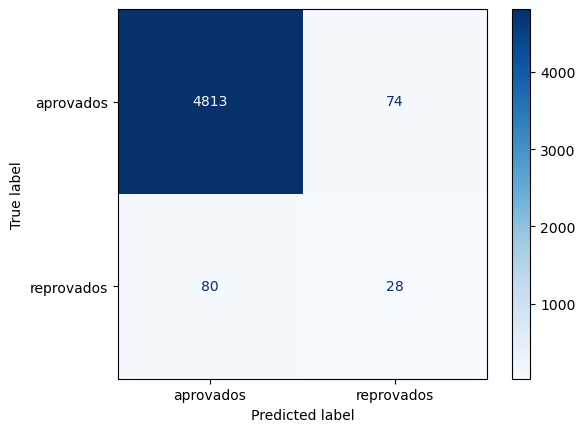

In [15]:
# Criar a matriz de confusão para a base de teste
matriz_confusao_test = confusion_matrix(y_val, y_pred_test)

# Exibir a matriz de confusão com rótulos para a base de teste
disp_test = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_test, display_labels=['aprovados', 'reprovados'])
disp_test.plot(cmap=plt.cm.Blues)
plt.show()

##### Passo 3: Calcular a acurácia da base de teste #####

In [17]:
# Calcular a acurácia na base de validação (teste)
acuracia_teste = accuracy_score(y_val, y_pred_test)
print(f"Acurácia na base de teste: {acuracia_teste:.2f}")

# Comparar com a acurácia da base de treinamento
print(f"Acurácia na base de treinamento: {acuracia_treino:.2f}")

Acurácia na base de teste: 0.97
Acurácia na base de treinamento: 0.99


##### Passo 4: Treinar uma nova árvore com restrições e avaliar a matriz de confusão #####

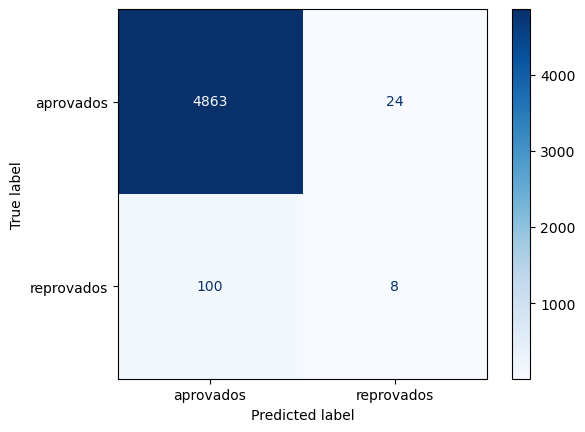

Proporção de proponentes classificados como 'maus': 0.01


In [19]:
# Definir um novo modelo de árvore de decisão com restrições
modelo_arvore_restrita = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o novo modelo na base de treinamento
modelo_arvore_restrita.fit(X_train, y_train)

# Fazer previsões na base de teste
y_pred_test_restrita = modelo_arvore_restrita.predict(X_val)

# Criar a matriz de confusão para o novo modelo
matriz_confusao_test_restrita = confusion_matrix(y_val, y_pred_test_restrita)

# Exibir a nova matriz de confusão
disp_test_restrita = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_test_restrita, display_labels=['aprovados', 'reprovados'])
disp_test_restrita.plot(cmap=plt.cm.Blues)
plt.show()

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = sum(y_pred_test_restrita == 1) / len(y_pred_test_restrita)
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2f}")


##### Passo 5: Acurácia se todos fossem classificados como 'bons #####

In [21]:
# Prever todos os contratos como 'bons' (aprovados)
y_pred_all_bons = [0] * len(y_val)

# Calcular a acurácia desse cenário
acuracia_all_bons = accuracy_score(y_val, y_pred_all_bons)
print(f"Acurácia classificando todos como 'bons': {acuracia_all_bons:.2f}")

Acurácia classificando todos como 'bons': 0.98
